In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

# Read the CSV file into a DataFrame
data = pd.read_csv('Car_prices.csv')

# Display the first few rows of the DataFrame
print(data.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [2]:
# Basic data analysis
analysis = {
    'Shape': data.shape,
    'Data Types': data.dtypes,
    'Missing Values': data.isnull().sum(),
    'Unique Values': data.nunique(),
    'Descriptive Statistics': data.describe(include='all')
}
analysis['Descriptive Statistics'] 

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
count,558837.000000,548536,548438,548186,545642,493485,558833,558837,547017.000000,558743.000000,558088,558088,558837,558799.000000,558825.000000,558825
unique,NaN,96,973,1963,87,4,550297,64,NaN,NaN,46,17,14263,NaN,NaN,3766
top,NaN,Ford,Altima,Base,Sedan,automatic,automatic,fl,NaN,NaN,black,black,nissan-infiniti lt,NaN,NaN,Tue Feb 10 2015 01:30:00 GMT-0800 (PST)
freq,NaN,93554,19349,55817,199437,475915,22,82945,NaN,NaN,110970,244329,19693,NaN,NaN,5334
mean,2010.038927,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.672365,68320.017767,NaN,NaN,NaN,13769.377495,13611.358810,NaN
std,3.966864,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.402832,53398.542821,NaN,NaN,NaN,9679.967174,9749.501628,NaN
min,1982.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,NaN,25.000000,1.000000,NaN
25%,2007.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.000000,28371.000000,NaN,NaN,NaN,7100.000000,6900.000000,NaN
50%,2012.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,52254.000000,NaN,NaN,NaN,12250.000000,12100.000000,NaN
75%,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.000000,99109.000000,NaN,NaN,NaN,18300.000000,18200.000000,NaN


In [3]:
# Remove rows with invalid VIN entries
# A valid VIN is exactly 17 characters long
data_cleaned = data[data['vin'].str.len() == 17]

# Step 2: Handle Missing Values
# For simplicity, we'll drop rows with any missing values. More sophisticated approaches could be used for a real project.
data_cleaned = data_cleaned.dropna()

# Convert 'saledate' to datetime format
data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], errors='coerce')

# Display the shape of the cleaned data and the first few rows to verify changes
data_cleaned.shape, data_cleaned.head()


C:\Users\Mirce\AppData\Local\Temp\ipykernel_10284\599606960.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], errors='coerce')
C:\Users\Mirce\AppData\Local\Temp\ipykernel_10284\599606960.py:10: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  data_cleaned['saledate'] = pd.to_datetime(data_cleaned['saledate'], errors='coerce')


((472325, 16),
    year   make                model        trim   body transmission  \
 0  2015    Kia              Sorento          LX    SUV    automatic   
 1  2015    Kia              Sorento          LX    SUV    automatic   
 2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
 3  2015  Volvo                  S60          T5  Sedan    automatic   
 4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   
 
                  vin state  condition  odometer  color interior  \
 0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
 1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
 2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
 3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
 4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   
 
                                    seller      mmr  sellingprice  \
 0                 kia motors america  inc  20500.0       21500.0   
 1 

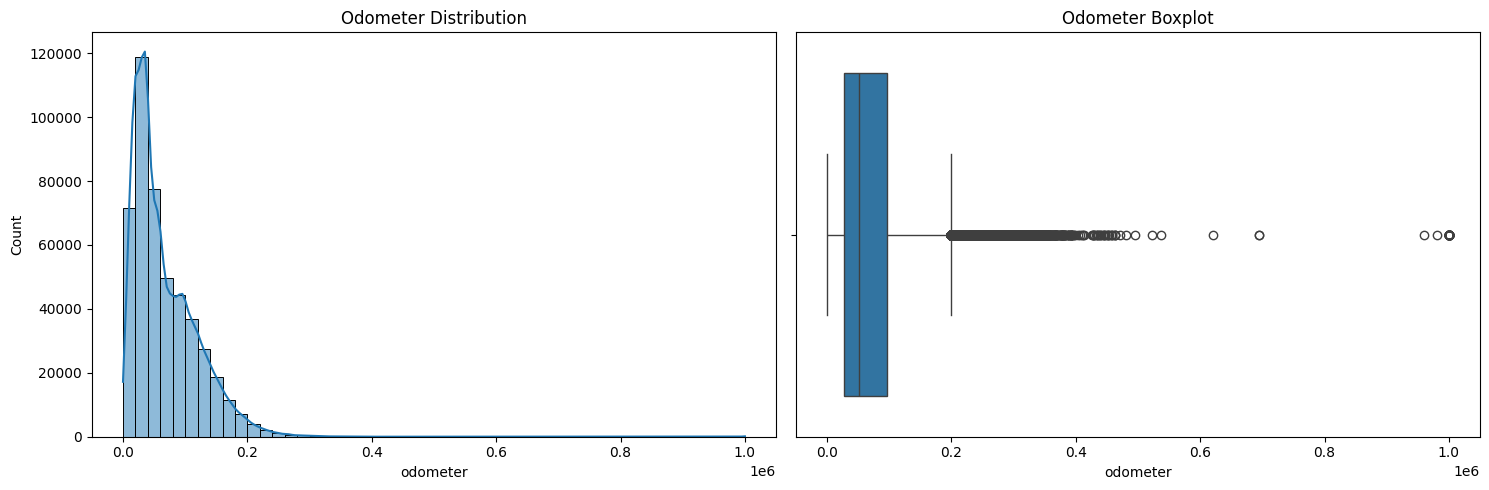

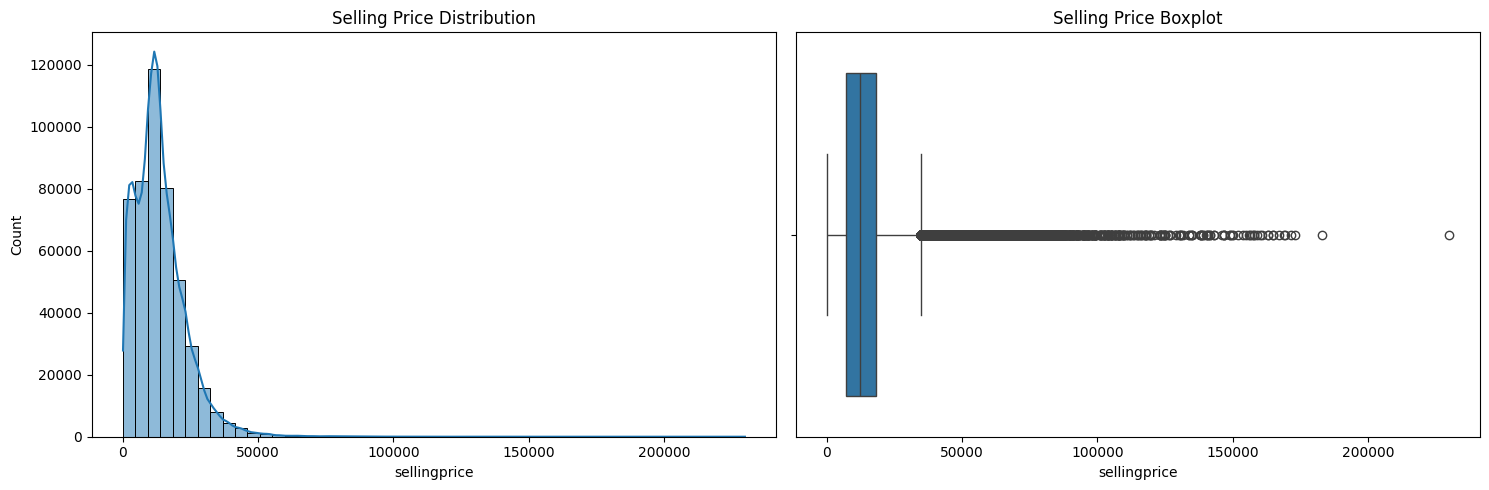

In [4]:
# Set up the matplotlib figure
f, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot a histogram and box plot for odometer readings
sns.histplot(data_cleaned['odometer'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Odometer Distribution')
sns.boxplot(x=data_cleaned['odometer'], ax=axes[1])
axes[1].set_title('Odometer Boxplot')

plt.tight_layout()
plt.show()

# Plot a histogram and box plot for selling prices
f, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.histplot(data_cleaned['sellingprice'], bins=50, kde=True, ax=axes[0])
axes[0].set_title('Selling Price Distribution')
sns.boxplot(x=data_cleaned['sellingprice'], ax=axes[1])
axes[1].set_title('Selling Price Boxplot')

plt.tight_layout()
plt.show()


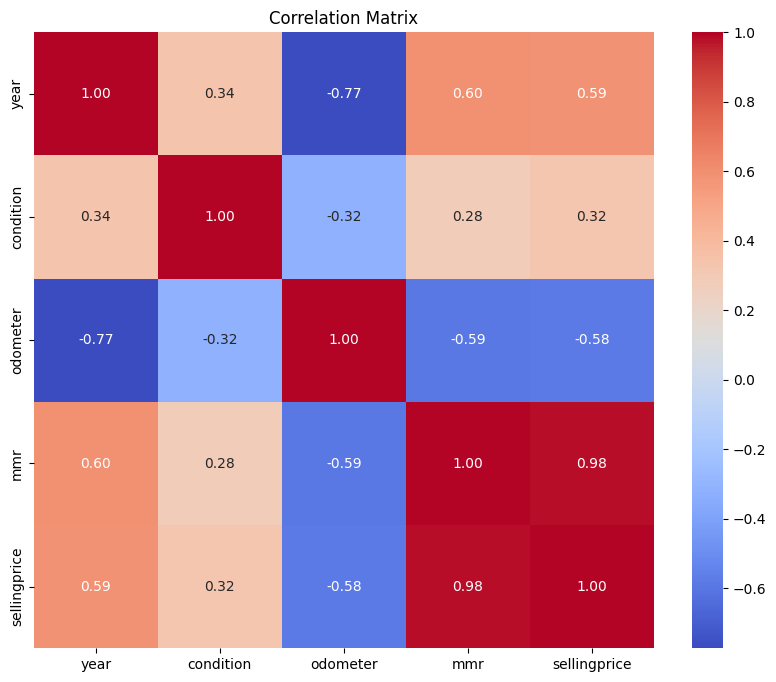

In [5]:
# Select only numeric columns for correlation matrix calculation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)

# Add titles and labels as necessary
plt.title('Correlation Matrix')
plt.show()

In [6]:
def gini(array):
    """Calculate the Gini coefficient of a numpy array."""
    array = array.flatten()  # all values are treated equally, arrays must be 1d
    if np.amin(array) < 0:
        array -= np.amin(array)  # values cannot be negative
    array += 0.0000001  # values cannot be 0
    array = np.sort(array)  # values must be sorted
    index = np.arange(1, array.shape[0]+1)  # index per array element
    n = array.shape[0]  # number of array elements
    return ((np.sum((2 * index - n - 1) * array)) / (n * np.sum(array)))  # Gini coefficient
# Extract the 'sellingprice' column again and drop NA values if any
selling_prices = data_cleaned['sellingprice'].dropna()

# Calculate Gini index for the sellingprice column
gini_index = gini(selling_prices.values)
gini_index


0.3649070911731054

In [7]:
# Bin the data into ranges
bins = pd.cut(selling_prices, bins=10)  # Adjust the number of bins as needed
probabilities = bins.value_counts(normalize=True)

# Calculate entropy
entropy = -np.sum(probabilities * np.log2(probabilities + np.finfo(float).eps))  # Adding a small epsilon to avoid log2(0)

print(f"The entropy of the selling prices is: {entropy:.4f}")

The entropy of the selling prices is: 0.6248


In [12]:
X = data_cleaned[['odometer', 'make']]
y = data_cleaned['sellingprice']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', 'passthrough', ['odometer']),
        ('cat', OneHotEncoder(), ['make'])
    ])),
    ('regressor', LinearRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Evaluate the model
y_pred = pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Example of prediction
sample_data = pd.DataFrame({'odometer': [50000], 'make': ['Kia']})
predicted_price = pipeline.predict(sample_data)
print(f'Predicted Price: {predicted_price[0]}')

Mean Squared Error: 52452661.14125447
Predicted Price: 13119.428627257314
